## What is K-Nearest Neighbors (KNN)?

K-Nearest Neighbors is a machine learning technique and algorithm that can be used for both regression and classification tasks. K-Nearest Neighbors examines the labels of a chosen number of data points surrounding a target data point, in order to make a prediction about the class that the data point falls into. K-Nearest Neighbors (KNN) is a conceptually simple yet very powerful algorithm, and for those reasons, it’s one of the most popular machine learning algorithms. 

## How a KNN Algorithm Operates

A KNN algorithm goes through three main phases as it is carried out:

    1. Setting K to the chosen number of neighbors.
    2. Calculating the distance between a provided/test example and the dataset examples.
    3. Sorting the calculated distances.
    4. Getting the labels of the top K entries.
    5. Returning a prediction about the test example.

In the first step, K is chosen by the user and it tells the algorithm how many neighbors (how many surrounding data points) should be considered when rendering a judgment about the group the target example belongs to. In the second step, note that the model checks the distance between the target example and every example in the dataset. The distances are then added into a list and sorted. Afterward, the sorted list is checked and the labels for the top K elements are returned. In other words, if K is set to 5, the model checks the labels of the top 5 closest data points to the target data point. 

## Why The Value Of K Matters

The main limitation when using KNN is that in an improper value of K (the wrong number of neighbors to be considered) might be chosen. If this happen, the predictions that are returned can be off substantially. It’s very important that, when using a KNN algorithm, the proper value for K is chosen. You want to choose a value for K that maximizes the model’s ability to make predictions on unseen data while reducing the number of errors it makes.

## KNN Pros And Cons
### Pros:

1. KNN can be used for both regression and classification tasks, unlike some other supervised learning algorithms.

2. KNN is highly accurate and simple to use. It’s easy to interpret, understand, and implement.

3. KNN doesn’t make any assumptions about the data, meaning it can be used for a wide variety of problems.

### Cons:

1. KNN stores most or all of the data, which means that the model requires a lot of memory and its computationally expensive. Large datasets can also cause predictions to be take a long time.

2. KNN proves to be very sensitive to the scale of the dataset and it can be thrown off by irrelevant features fairly easily in comparison to other models.

Taken from: https://www.unite.ai/what-is-k-nearest-neighbors/

Supose you have 4 data points stored in $X$, and a fith one as a test point stored in $w$. You need to compute the distance to each data point in $X$:

$$
\boldsymbol{X}=
\begin{bmatrix}
    1 & 1 \\\\
    3 & 2 \\\\
    2 & 1 \\\\
    2 & 2
\end{bmatrix}
$$

$w=[1,2]$


The easiest way is using the euclidean distance, let us consider $x^{(i)}$ the i-th data point in $X$, and $x^{(i)}_j$ the j-th coordinate of that data point. For example $x^{(2)}=[3,2]$ and $x^{(2)}_1 =3$.

the distance $d$ from $w$ to $x^{(i)}$ can be calculated as: $d=\sqrt(\sum _{j=1} ^2(w_j -x^{(i)}_j)^2 )= \sqrt((w_1-x^{(i)}_1)^2 + (w_2-x^{(i)}_2)^2 )$. Let's say for example I want to compute the distance from $w$ to $x^{(2)}$. $d = \sqrt((1-3)^2 + (2-2)^2 ) = 2$. We can compute in the same way the distance from $w$ to the other data points in $X$ and store it in the distance vector $D$:

$D = [1,2,1.41,1]$







## Execise

Implemente a code in python to compute the distances from $w$ to each point in $X$

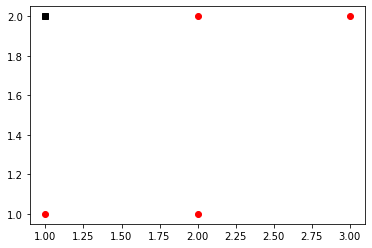

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
X = np.array([[1,1],[3,2],[2,1],[2,2]])
w = np.array([1,2])

#plot the data points
plt.plot(X[:,0],X[:,1],'ro');
plt.plot(w[0],w[1],'ks');


In [12]:
#your code goes here
d = np.sqrt(((X-w)**2).sum(axis=1))
print(d)

[1.         2.         1.41421356 1.        ]


In [11]:
#sort the distances
print(np.sort(d))
#which is the closest data point in X to w

[1.         1.         1.41421356 2.        ]


In [13]:
from sklearn.model_selection import train_test_split
x = np.arange(1, 25).reshape(12, 2)
y = np.array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0])
print('x:\n',x)
print('y: \n',y)


x:
 [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]
 [17 18]
 [19 20]
 [21 22]
 [23 24]]
y: 
 [0 1 1 0 1 0 0 1 1 0 1 0]


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
print('x train:\n', x_train)
print('y train: \n',y_train)
print('x test: \n',x_test)
print('y test: \n',y_test)

x train:
 [[ 9 10]
 [ 1  2]
 [17 18]
 [23 24]
 [19 20]
 [15 16]
 [11 12]
 [ 5  6]
 [13 14]]
y train: 
 [1 0 1 0 0 1 0 1 0]
x test: 
 [[ 3  4]
 [21 22]
 [ 7  8]]
y test: 
 [1 1 0]


In [ ]:
#use x_train and y_train to predict y_test given x_test
#your code

# Using iris
Let's load the iris data set and perform some experiments


In [15]:
################################################################################################
################################################################################################
def loadIris():
    #define the name of the data file and the labels
    file_name='data_lb1/iris2.data'
    data=np.loadtxt(file_name,delimiter=',') 
    #read all lines
    X=data[:,:-1]
    Y=data[:,-1]

    
    return X,Y

In [17]:
X,y = loadIris()

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import time
logistic = LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=1)


#train 
start = time.time()#inicar medida del tiempo
knn.fit(x_train, y_train)
end = time.time() #tomar el tiempo final
total=end - start

print('Tiempo total entrenamiento: ' + str(total) + ' segundos')

start = time.time()#inicar medida del tiempo
score= knn.score(x_test, y_test)
end = time.time() #tomar el tiempo final
total=end - start

print('Tiempo total evaluando: ' + str(total) + ' segundos')


print('KNN score: %f' % score)

Tiempo total entrenamiento: 0.0012156963348388672 segundos
Tiempo total evaluando: 0.0030090808868408203 segundos
KNN score: 0.977778


# Support Vector Machines

SVMs are among the best (and many believe are indeed the best) “off-the-shelf” supervised learning algorithm. To tell the SVM story, we’ll need to first talk about margins and the idea of separating data with a large “gap.” Next, we’ll talk about the optimal margin classifier, which will lead us into a digression on Lagrange duality. We’ll also see kernels, which give a way to apply SVMs efficiently in very high dimensional (such as infinite-
dimensional) feature spaces.

### Exercise 1
lets implement the Gaussian kernel

Given two data examples, $(x^i,y^i)$ and $(x^j,y^j)$, where the input vectors $x$ have $n$ features. The Gaussian kernel is defined as:


$K(x^i,x^j)= exp(-\frac{|x^i-x^j|^2}{2\sigma^ 2}) = exp(-\frac{\sum_{k=1} ^ n (x^i _k-x^j _k)^2}{2\sigma^2})$


Parameter $\sigma$ controls the decay speed as the vectors $x^i$ and $x^j$ go appart.

### Your task
Implement a  function to compute the Gaussian Kernel, it should receive two feature vectors and a parameter $\sigma$


Once you’ve completed the function gaussianKernel, the next cell  will test your kernel function on two provided examples and you should expect to see a value of 0.324652.

In [3]:
import numpy as np

In [23]:
def gaussianKernel(x1,x2,sigma):
    K=0
    #your code here
    K=np.exp(-((x1-x2)**2).sum()/sigma**2)
    #
    return K
    

In [28]:
x1 = np.array([1, 2])
x2 = np.array([0, 4]) 
sigma = 0.5;
K = gaussianKernel(x1, x2, sigma)
print(K)

2.061153622438558e-09


### Exercise 2
We will begin by with a 2D example dataset which can be separated by a linear boundary. The script will plot the training data. In this dataset, the positions of the positive examples (indicated with +) and the negative examples (indicated with o) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example + on the far left at about (0.1, 4.1). As part of this exercise, you will also see how
this outlier affects the SVM decision boundary.


In [29]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
%matplotlib inline
########################################################################################
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 2, max_x + 2)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


In this part of the exercise, you will try using different values of the C parameter with SVMs. Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly. C plays a role similar to $\frac{1}{\lambda}$, where $\lambda$ is the regularization parameter that we were using previously for logistic regression.

The next part in run the SVM training (with C = 1) using SVM software that I have included with the starter code, 
When C = 1, you should find that the SVM puts the decision boundary in the gap between the two datasets and misclassifies the data point on the far left.

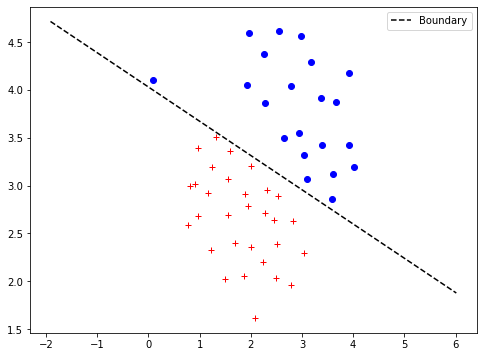

In [37]:
########################################################################################
#cargar dataset1
data=np.loadtxt('svm/dataset1.data',delimiter=',')
X=data[:,:2]
Y=data[:,2].astype(int)
########################
##graficar datos
plt.figure(figsize=(8, 6))

plt.plot(X[Y==0,0],X[Y==0,1],'+r')
plt.plot(X[Y==1,0],X[Y==1,1],'ob')
#create classifiers
C = 50   # parametro de regularizacion de la svm
clf_lin  = svm.SVC(kernel='linear',C=C)

#entrenar
clf_lin.fit(X, Y)
#graficar frontera
min_x=X[:,0].min()
max_x=X[:,0].max()

plot_hyperplane(clf_lin, min_x, max_x, 'k--', label= 'Boundary')
plt.legend();


### Your task
Your task is to try different values of C on this dataset. Specifically, you should change the value of C in the script to C = 100 and run the SVM training again. When C = 100, you should find that the SVM now classifies
every single example correctly, but has a decision boundary that does not appear to be a natural fit for the data

### Excercise 3
The next part  will load and plot dataset 2. From the plot, you can obserse that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, you will be able to learn a non-linear
decision boundary that can perform reasonably well for the dataset.

### Your task
You should change the parameter gamma, it is associated with the parameter $\sigma$, from the first equation.You should not use values higher than 50.

What is the effect of changing the parameter gamma?

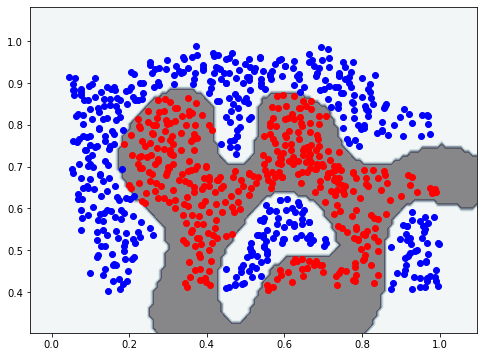

In [49]:
########################################################################################
def plot_hyperplane(clf, X):
    # create a mesh to plot in
    h=0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    CS=plt.contourf(xx, yy, Z,cmap=plt.cm.bone,alpha=0.5)
    #CS.cmap.set_under('yellow')
    #CS.cmap.set_over('cyan')

########################################################################################
#cargar dataset2
data=np.loadtxt('svm/dataset2.data',delimiter=',')
X=data[:,:2]
Y=data[:,2].astype(int)
########################
##graficar datos
plt.figure(figsize=(8, 6))

plt.plot(X[Y==0,0],X[Y==0,1],'or')
plt.plot(X[Y==1,0],X[Y==1,1],'ob')
########################################################################
#create classifiers
C    = 100  # parametro de regularizacion de la svm
gamma= 50 #parametro gamma de la funcion de base radial
clf_rbf     = svm.SVC(kernel='rbf', gamma=gamma, C=C)
#entrenar
clf_rbf.fit(X, Y)

#graficar frontera
plot_hyperplane(clf_rbf,X)



### Exercise 4
In this part of the exercise, you will gain more practical skills on how to use a SVM with a Gaussian kernel. The next part will load and display a third dataset. You will be using the SVM with the Gaussian kernel with this dataset.

In the provided dataset, data3, you are given the variables X, y, X_test, y_test. The provided code trains the SVM classifier using the training set (X, y) with some initial parameters. Your task is to use the cross validation set X_test, y_test to determine the best C and gamma parameters to use. You should write any additional code necessary to help you search over the parameters C and gamma. For both C and gamma, It is  suggested trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).

Note that you should try all possible pairs of values for C and gamma (e.g., C = 0.3 and gamma = 0.1). For example, if you try each of the 8 values listed above for C
and for gamma , you would end up training and evaluating (on the cross validation set) a total of 8 x 8 = 64 different models.

96.0


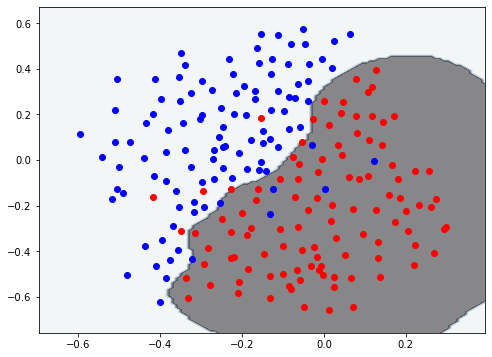

In [60]:
########################################################################################
def plot_hyperplane(clf, X):
    # create a mesh to plot in
    h=0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    CS=plt.contourf(xx, yy, Z,cmap=plt.cm.bone,alpha=0.5)
    #CS.cmap.set_under('yellow')
    #CS.cmap.set_over('cyan')


########################################################################################
#cargar dataset3: conjunto de entrenamiento y conjunto de prueba
data=np.loadtxt('svm/dataset3_train.data',delimiter=',')
X=data[:,:2]
y=data[:,2].astype(int)
data=np.loadtxt('svm/dataset3_test.data',delimiter=',')
X_test=data[:,:2]
y_test=data[:,2].astype(int)

########################

##graficar datos de entrenamiento
plt.figure(figsize=(8, 6))

plt.plot(X[y==0,0],X[y==0,1],'or')
plt.plot(X[y==1,0],X[y==1,1],'ob')

########################################################################
C=np.array([0.01, 0.03, 0.1,0.3, 1,3,10,30])       
gamma=np.array([0.01, 0.03, 0.1,0.3, 1,3,10,30])
## su codigo va aqui #########

#por ejemplo para un par de valores, los primeros de cada vector
clf_rbf     = svm.SVC(kernel='rbf', gamma=gamma[7], C=C[7])
#entrenar
clf_rbf.fit(X, y)
y_pred = clf_rbf.predict(X_test)
por  = (y_test==y_pred).sum()/y_test.size*100
print(por)


  
#graficar frontera para el mejor par (C,gamma)
plot_hyperplane(clf_rbf,X)


plt.show()



In [54]:
X.shape

(211, 2)

In [55]:
y.shape

(211,)

## Your conclussions?